In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
raw_data = pd.read_csv('Melbourne_housing_extra_data.csv')

In [4]:
raw_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra,-37.8014,144.9958,Northern Metropolitan,4019
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067,2.0,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067,3.0,2.0,1.0,0.0,NaN,NaN,Yarra,-37.8114,145.0116,Northern Metropolitan,4019
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019


In [5]:
df = raw_data.copy()

In [6]:
df.dropna(axis=0, inplace=True)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5382 entries, 2 to 17405
Data columns (total 21 columns):
Suburb           5382 non-null object
Address          5382 non-null object
Rooms            5382 non-null int64
Type             5382 non-null object
Price            5382 non-null float64
Method           5382 non-null object
SellerG          5382 non-null object
Date             5382 non-null object
Distance         5382 non-null float64
Postcode         5382 non-null int64
Bedroom2         5382 non-null float64
Bathroom         5382 non-null float64
Car              5382 non-null float64
Landsize         5382 non-null float64
BuildingArea     5382 non-null float64
YearBuilt        5382 non-null float64
CouncilArea      5382 non-null object
Lattitude        5382 non-null float64
Longtitude       5382 non-null float64
Regionname       5382 non-null object
Propertycount    5382 non-null int64
dtypes: float64(10), int64(3), object(8)
memory usage: 925.0+ KB


In [8]:
# to get rid of
# suburb, address, sellerG, date, lat, long, councilarea
df.drop(['Suburb', 'Address', 'SellerG', 'Date', 'Lattitude', 'Longtitude', 'CouncilArea', 'Postcode'], axis=1, inplace=True)

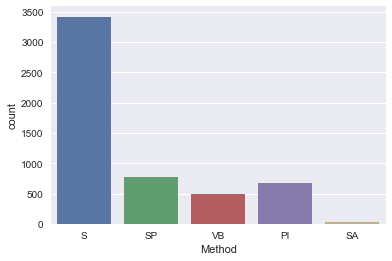

In [9]:
sns.countplot(df['Method'])

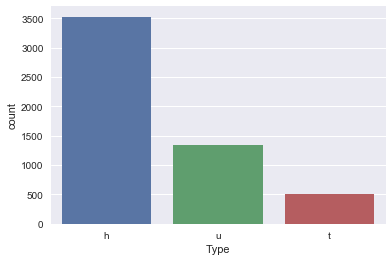

In [10]:
sns.countplot(df['Type'])

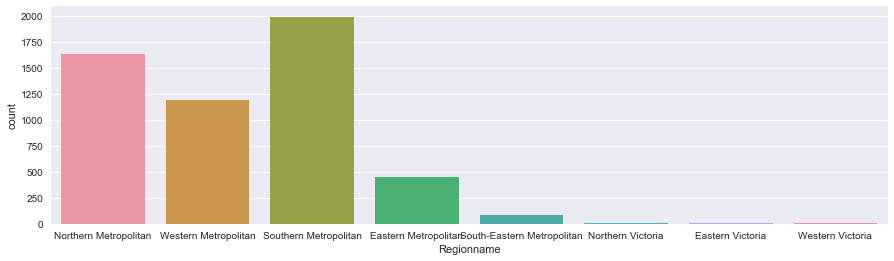

In [11]:
plt.figure(figsize=(15,4))
sns.countplot(df['Regionname'])

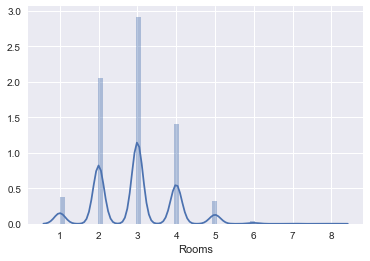

In [12]:
sns.distplot(df['Rooms'])

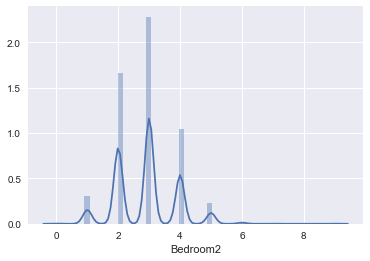

In [13]:
sns.distplot(df['Bedroom2'])

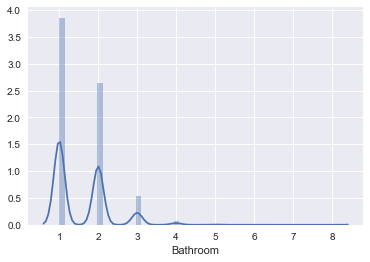

In [14]:
sns.distplot(df['Bathroom'])

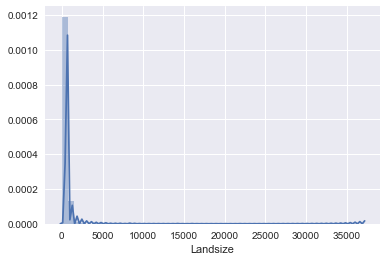

In [15]:
sns.distplot(df['Landsize'])

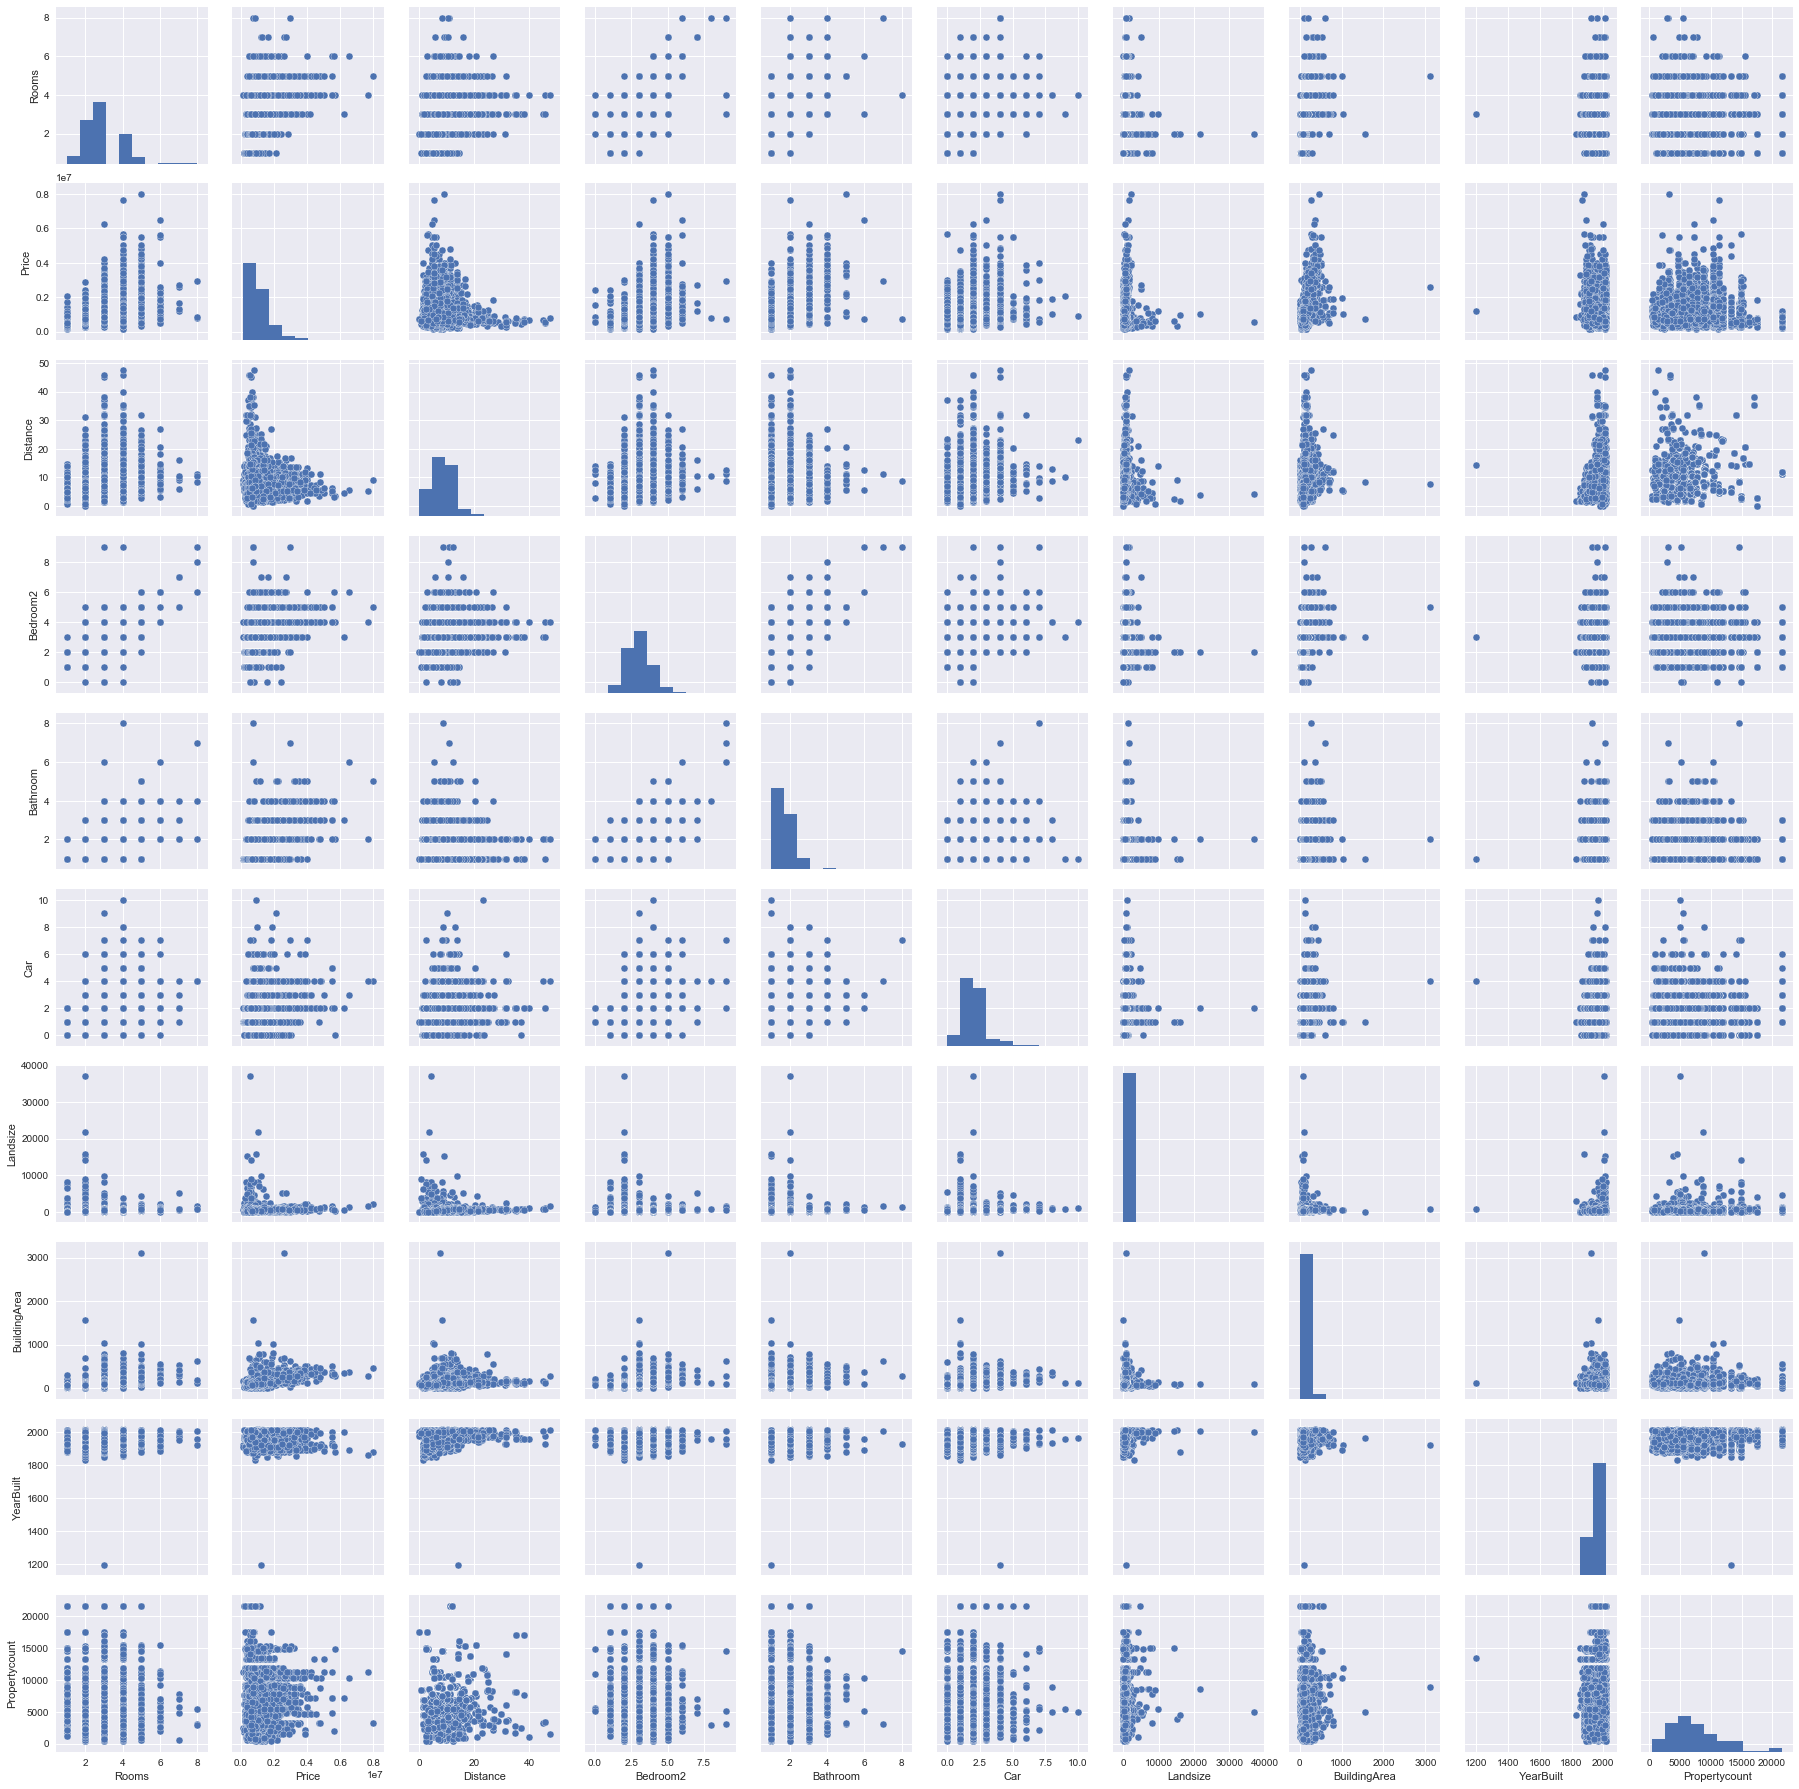

In [16]:
sns.pairplot(df)

In [17]:
df = pd.concat([df, pd.get_dummies(df['Type']), pd.get_dummies(df['Method']), 
               pd.get_dummies(df['Regionname'])], axis=1)

In [18]:
df.drop(['Type', 'Method', 'Regionname'], axis=1, inplace=True)

In [19]:
df

,Rooms,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,h,t,u,PI,S,SA,SP,VB,Eastern Metropolitan,Eastern Victoria,Northern Metropolitan,Northern Victoria,South-Eastern Metropolitan,Southern Metropolitan,Western Metropolitan,Western Victoria
2,2,1035000.0,2.5,2.0,1.0,0.0,156.0,79.00,1900.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,3,1465000.0,2.5,3.0,2.0,0.0,134.0,150.00,1900.0,4019,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
6,4,1600000.0,2.5,3.0,1.0,2.0,120.0,142.00,2014.0,4019,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
11,3,1876000.0,2.5,4.0,2.0,0.0,245.0,210.00,1910.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
14,2,1636000.0,2.5,2.0,1.0,2.0,256.0,107.00,1890.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
18,2,1097000.0,2.5,3.0,1.0,2.0,220.0,75.00,1900.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
24,3,1350000.0,2.5,3.0,2.0,2.0,214.0,190.00,2005.0,4019,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
25,2,750000.0,2.5,2.0,2.0,1.0,0.0,94.00,2009.0,4019,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
30,2,1310000.0,2.5,2.0,1.0,2.0,238.0,97.00,1890.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
32,3,1200000.0,2.5,3.0,2.0,1.0,113.0,110.00,1880.0,4019,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [20]:
X = df.drop(['Price'], axis=1)
y = df.Price

In [21]:
from sklearn import preprocessing

In [22]:
X_scaled = preprocessing.scale(X)

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.3, random_state=42)

In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
lr = LinearRegression()

In [28]:
lr.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
y_pred = lr.predict(X_test)

In [30]:
lr.score(X_test, y_test)

0.62774809055048664

In [31]:
lr.coef_

array([  1.49134020e+05,  -2.17458152e+05,  -3.00425942e+04,
         1.49384137e+05,   6.12814656e+04,   1.32907978e+04,
         1.79433784e+05,  -1.01748994e+05,   5.40949101e+03,
         1.26512243e+18,   7.83934757e+17,   1.15051950e+18,
         2.44008648e+17,   3.55132249e+17,   5.21188663e+16,
         2.59273821e+17,   2.11628508e+17,   2.40517936e+17,
         3.93217473e+16,   4.00483313e+17,   3.35430626e+16,
         1.07286455e+17,   4.20477892e+17,   3.61863119e+17,
         3.13795812e+16])

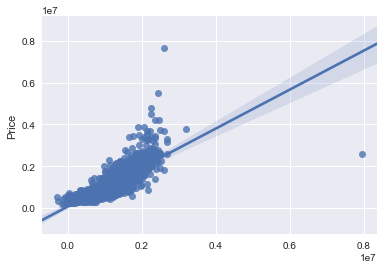

In [32]:
sns.regplot(y_pred, y_test)

In [33]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=100)
ridge_reg.fit(X_train, y_train)
y_pred_ridge = ridge_reg.predict(X_test)
ridge_reg.score(X_test, y_test)

0.63114736499193647

In [34]:
ridge_reg.coef_

array([ 121935.70860287, -207242.59337751,    -381.40374565,
        146153.51205244,   59158.6454866 ,   13220.94820526,
        175302.79114251, -101588.20859132,    4819.7939974 ,
         76311.0284327 ,   -8674.48353898,  -78001.77631064,
        -25629.32157874,   19655.2043509 ,   -8114.61796669,
          1847.87333974,   -3697.99572695,    8102.07372852,
         16112.08439871,  -73892.93698763,   16380.31219674,
         29353.57272754,  128378.26918203,  -84846.77641736,
          1104.13656463])

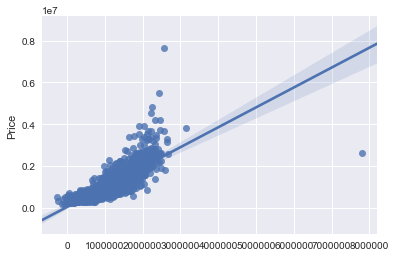

In [35]:
sns.regplot(y_pred_ridge, y_test)

In [37]:
from sklearn.linear_model import Lasso

In [44]:
lasso_reg = Lasso()
lasso_reg.fit(X_train, y_train)
y_pred_lasso = lasso_reg.predict(X_test)
lasso_reg.score(X_test, y_test)

C:\Users\johna\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:484: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


0.62776496055352005

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42)

In [33]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
dtr_y_pred = dtr.predict(X_test)
dtr.score(X_test, y_test)

0.57411587704513167

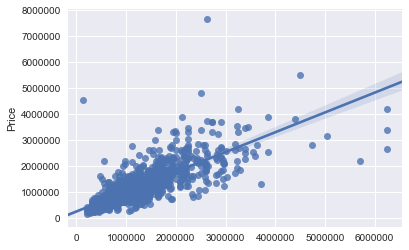

In [34]:
sns.regplot(dtr_y_pred, y_test)

In [36]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)
rfr_y_pred = rfr.predict(X_test)
rfr.score(X_test, y_test)

0.80793357017687772

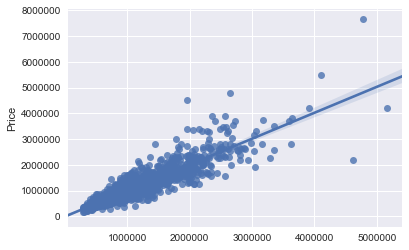

In [37]:
sns.regplot(rfr_y_pred, y_test)